## Data Cleaning

In [3]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs

df1 = pd.read_csv('googleplay_part1.csv')
df1.head()

,app,reviews,rating
0,JailBase - Arrests + Mugshots,17240,NaN
1,EF Smart English for Phone,208,/
2,CP Calculator,187,4.1
3,Workout Tracker & Gym Trainer - Fitness Log Book,5420,4.6
4,All Language Translator,29944,4


Read a second dataset

In [4]:
df2 = pd.read_csv('googleplay_part2.csv')
df2.head()

,app,size,price
0,JailBase - Arrests + Mugshots,NaN,0.0
1,EF Smart English for Phone,13.0,0.0
2,CP Calculator,2.9,0.0
3,Workout Tracker & Gym Trainer - Fitness Log Book,21.0,0.0
4,All Language Translator,2.1,0.0


Merge both datasets

In [7]:
df=df1.merge(df2, on='app')
df.head()

,app,reviews,rating,size,price
0,JailBase - Arrests + Mugshots,17240,NaN,NaN,0.0
1,EF Smart English for Phone,208,/,13.0,0.0
2,CP Calculator,187,4.1,2.9,0.0
3,Workout Tracker & Gym Trainer - Fitness Log Book,5420,4.6,21.0,0.0
4,All Language Translator,29944,4,2.1,0.0


Check the types of the columns

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 498
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   app      499 non-null    object 
 1   reviews  499 non-null    int64  
 2   rating   420 non-null    object 
 3   size     424 non-null    float64
 4   price    499 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 23.4+ KB


Check the rating with value_counts(), clean it and convert it to numeric

In [14]:
df['rating'].value_counts()

4.4    48
4.2    44
4.3    44
4.5    42
4.6    36
4.7    34
4.1    33
4      31
3.9    17
5      15
3.8    12
3.7     8
4.8     8
3.6     6
3.5     6
4.9     5
3.4     5
3.3     4
3.1     3
2.9     3
1.9     2
3       2
3.2     2
1       2
2.1     1
5.9     1
2.7     1
2.5     1
/       1
1.6     1
5.3     1
2.2     1
Name: rating, dtype: int64

Get rid of all rows containing a / and ratings above 5

In [15]:
df3=df[-df['rating'].isin(['/','5.3','5.9'])]

Convert to numeric using the panda function to_numeric

In [22]:
pd.to_numeric(df3['rating'])

0      NaN
2      4.1
3      4.6
4      4.0
5      NaN
      ... 
494    4.3
495    4.7
496    4.4
497    3.3
498    NaN
Name: rating, Length: 496, dtype: float64

In [21]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496 entries, 0 to 498
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   app      496 non-null    object 
 1   reviews  496 non-null    int64  
 2   rating   417 non-null    float64
 3   size     421 non-null    float64
 4   price    496 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 23.2+ KB


Plot you ratings data

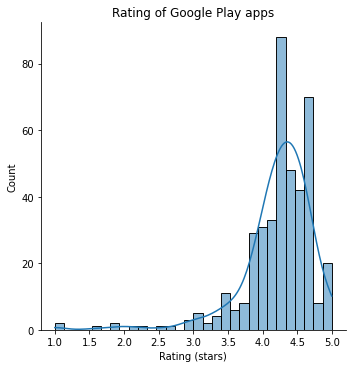

In [23]:
sns.displot(df3['rating'].dropna(), kde=True) #Selecting the rating column. I need to drop the NA's for the plot
plt.title('Rating of Google Play apps')
plt.xlabel('Rating (stars)')
plt.show()